In [302]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano 
import theano.tensor as tt
import arviz as az
from pprint import pprint
from scipy import stats
import pandas as pd
from importlib import reload

import sys
sys.path.append("../../")
from global_utilities import (
    log_mean_exp, 
    log_normalize, 
    log_sum_exp, 
    calculate_p_LoT, 
    LoT_indices_to_operators
)

# Produce and fit simulated data

In [305]:
import simulated_data_tests
import model_fitting
reload(simulated_data_tests)
reload(model_fitting)

<module 'model_fitting' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\neuralNetsLoT\\NeuralNetworksLoT\\bayesianModel\\model_fitting.py'>

In [306]:
from model_fitting import define_model_singleLoT, sample_smc, define_model_joint
from simulated_data_tests import create_sample_data, plot_simulated_data_raw
from plotting import plot_data_fitted

In [307]:
sample_data = create_sample_data()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


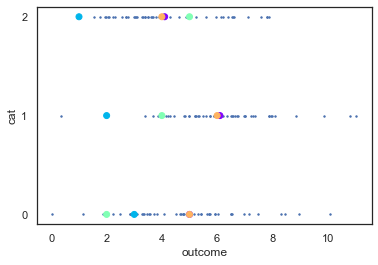

In [308]:
plot_simulated_data_raw(sample_data)

In [316]:
L = sample_data['a']
category_i = sample_data['category_i']
outcome_i = sample_data['outcome_i']

## NUTS

In [16]:
models, traces = [], []
for LoT in L:
    print(LoT)
    model = define_model_singleLoT(LoT, category_i, outcome_i)
    trace = model_fitting.sample_NUTS(model, None)
#     fit = model_fitting.fit_variational(model, None)
#     trace = sample_smc(model, None)
    models.append(model)
    traces.append(trace)

[5.  6.1 4.1]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_1, a_0, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 79 seconds.


Finished the NUTS fitting
[3. 2. 1.]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_1, a_0, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


Finished the NUTS fitting
[2. 4. 5.]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_1, a_0, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 59 seconds.


Finished the NUTS fitting
[5. 6. 4.]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_1, a_0, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 65 seconds.


Finished the NUTS fitting


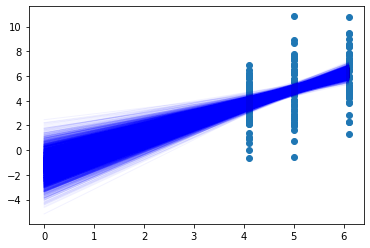

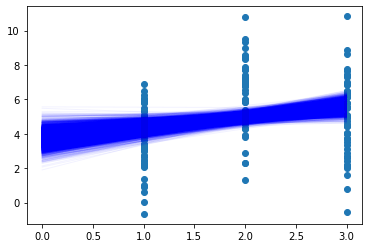

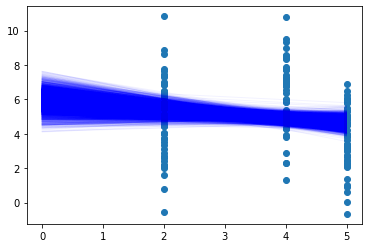

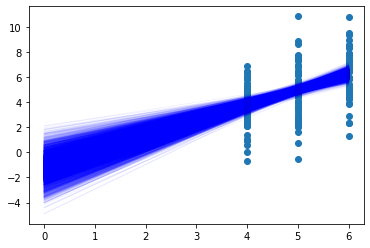

In [17]:
for LoT, trace in zip(L, traces): 
    fig_ax = plot_data_fitted(trace, LoT, category_i, outcome_i)
    plt.show()

In [317]:
loos = [
    az.loo(i)
    for i in traces
]

In [331]:
loo_compare = az.compare({
    str(i):t 
    for i,t in enumerate(traces)
})

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


In [333]:
loo_compare['weight']

3    8.326307e-01
0    0.000000e+00
1    1.673693e-01
2    2.664535e-15
Name: weight, dtype: float64

<AxesSubplot:xlabel='Log'>

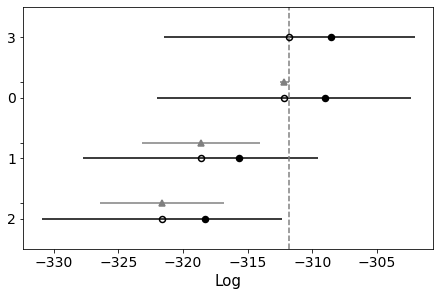

In [334]:
az.plot_compare(loo_compare)

## SMC

In [46]:
models_smc, traces_smc = [], []
for LoT in L:
    print(LoT)
    model = define_model_singleLoT(LoT, category_i, outcome_i)
#     trace = model_fitting.sample_NUTS(model, None)
#     fit = model_fitting.fit_variational(model, None)
    trace = sample_smc(model, None)
    models_smc.append(model)
    traces_smc.append(trace)

[5.  6.1 4.1]


Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.004
Stage:   2 Beta: 0.009
Stage:   3 Beta: 0.014
Stage:   4 Beta: 0.022
Stage:   5 Beta: 0.034
Stage:   6 Beta: 0.057
Stage:   7 Beta: 0.110
Stage:   8 Beta: 0.242
Stage:   9 Beta: 0.570
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.032
Stage:   5 Beta: 0.048
Stage:   6 Beta: 0.069
Stage:   7 Beta: 0.103
Stage:   8 Beta: 0.154
Stage:   9 Beta: 0.246
Stage:  10 Beta: 0.433
Stage:  11 Beta: 0.889
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.022
Stage:   4 Beta: 0.035
Stage:   5 Beta: 0.052
Stage:   6 Beta: 0.073
Stage:   7 Beta: 0.101
Stage:   8 Beta: 0.148
Stage:   9 Beta: 0.216
Stage:  10 Beta: 0.316
Stage:  11 Beta: 0.460
Stage:  12 Beta: 0.719
Stage:  13 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.013
S

[3. 2. 1.]


Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.009
Stage:   2 Beta: 0.015
Stage:   3 Beta: 0.023
Stage:   4 Beta: 0.036
Stage:   5 Beta: 0.055
Stage:   6 Beta: 0.083
Stage:   7 Beta: 0.136
Stage:   8 Beta: 0.251
Stage:   9 Beta: 0.550
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.009
Stage:   2 Beta: 0.017
Stage:   3 Beta: 0.027
Stage:   4 Beta: 0.040
Stage:   5 Beta: 0.057
Stage:   6 Beta: 0.083
Stage:   7 Beta: 0.130
Stage:   8 Beta: 0.223
Stage:   9 Beta: 0.455
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.009
Stage:   2 Beta: 0.014
Stage:   3 Beta: 0.021
Stage:   4 Beta: 0.033
Stage:   5 Beta: 0.050
Stage:   6 Beta: 0.084
Stage:   7 Beta: 0.168
Stage:   8 Beta: 0.386
Stage:   9 Beta: 0.922
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.018
Stage:   3 Beta: 0.027
Stage:   4 Beta: 0.038
Stage:   5 Beta: 0.053
Stage:   6 Beta: 0.084
Stage:   7 Beta: 0.161
S

[2. 4. 5.]


Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.014
Stage:   3 Beta: 0.024
Stage:   4 Beta: 0.036
Stage:   5 Beta: 0.051
Stage:   6 Beta: 0.074
Stage:   7 Beta: 0.107
Stage:   8 Beta: 0.154
Stage:   9 Beta: 0.227
Stage:  10 Beta: 0.382
Stage:  11 Beta: 0.726
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.022
Stage:   4 Beta: 0.032
Stage:   5 Beta: 0.044
Stage:   6 Beta: 0.063
Stage:   7 Beta: 0.108
Stage:   8 Beta: 0.197
Stage:   9 Beta: 0.444
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.007
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.029
Stage:   5 Beta: 0.044
Stage:   6 Beta: 0.067
Stage:   7 Beta: 0.104
Stage:   8 Beta: 0.177
Stage:   9 Beta: 0.357
Stage:  10 Beta: 0.859
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.006
Stage:   2 Beta: 0.013
Stage:   3 Beta: 0.020
Stage:   4 Beta: 0.033
S

[5. 6. 4.]


Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.010
Stage:   3 Beta: 0.015
Stage:   4 Beta: 0.025
Stage:   5 Beta: 0.038
Stage:   6 Beta: 0.063
Stage:   7 Beta: 0.120
Stage:   8 Beta: 0.268
Stage:   9 Beta: 0.667
Stage:  10 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.021
Stage:   4 Beta: 0.033
Stage:   5 Beta: 0.047
Stage:   6 Beta: 0.069
Stage:   7 Beta: 0.101
Stage:   8 Beta: 0.152
Stage:   9 Beta: 0.237
Stage:  10 Beta: 0.408
Stage:  11 Beta: 0.739
Stage:  12 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.012
Stage:   3 Beta: 0.021
Stage:   4 Beta: 0.031
Stage:   5 Beta: 0.046
Stage:   6 Beta: 0.066
Stage:   7 Beta: 0.096
Stage:   8 Beta: 0.144
Stage:   9 Beta: 0.233
Stage:  10 Beta: 0.455
Stage:  11 Beta: 1.000
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.005
Stage:   2 Beta: 0.011
Stage:   3 Beta: 0.018
Stage:   4 Beta: 0.027
S

array([7.54369024e-01, 2.55436336e-07, 7.04900524e-09, 2.45630713e-01])

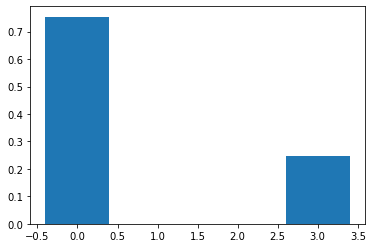

In [47]:
# this works when the trace is from SMC
calculate_p_LoT(traces_smc, barplot=True)

## VI

In [118]:
reload(model_fitting)

<module 'model_fitting' from 'C:\\Users\\faust\\Dropbox\\Amsterdam\\neuralNetsLoT\\NeuralNetworksLoT\\bayesianModel\\model_fitting.py'>

In [324]:
data = []
for LoT in L:
    print(LoT)
    length_i = LoT[category_i]
    model = define_model_singleLoT(length_i, outcome_i)
    fit, tracker = model_fitting.fit_variational(model, None)
    trace = fit.sample()
    data.append([model,trace,fit,tracker])
models_VI, traces_VI, fits_VI, trackers_VI = zip(*data)

[5.  6.1 4.1]


Finished [100%]: Average Loss = 329.79


[3. 2. 1.]


Finished [100%]: Average Loss = 338.56


[2. 4. 5.]


Finished [100%]: Average Loss = 340.01


[5. 6. 4.]


Finished [100%]: Average Loss = 330.03


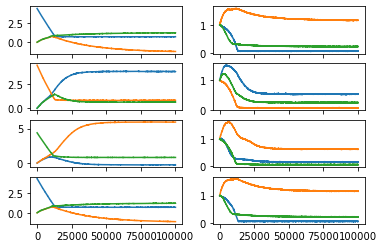

In [120]:
fig, axes = plt.subplots(4,2, sharex=True)
for i, t in enumerate(trackers_VI):
    axes[i,0].plot(np.array(t['mean']))
    axes[i,1].plot(np.array(t['std']))

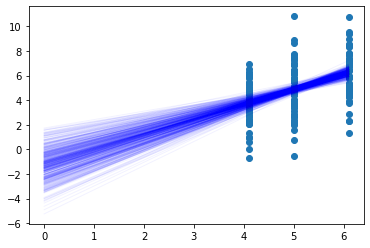

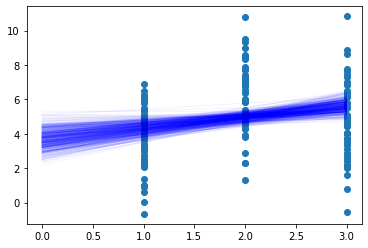

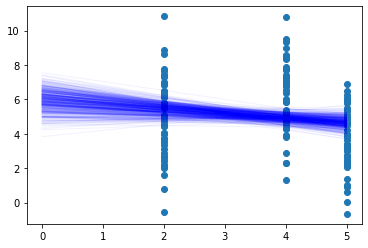

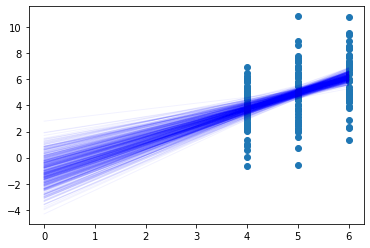

In [121]:
for LoT, trace in zip(L, traces_VI): 
    fig_ax = plot_data_fitted(trace, LoT, category_i, outcome_i)
    plt.show()

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


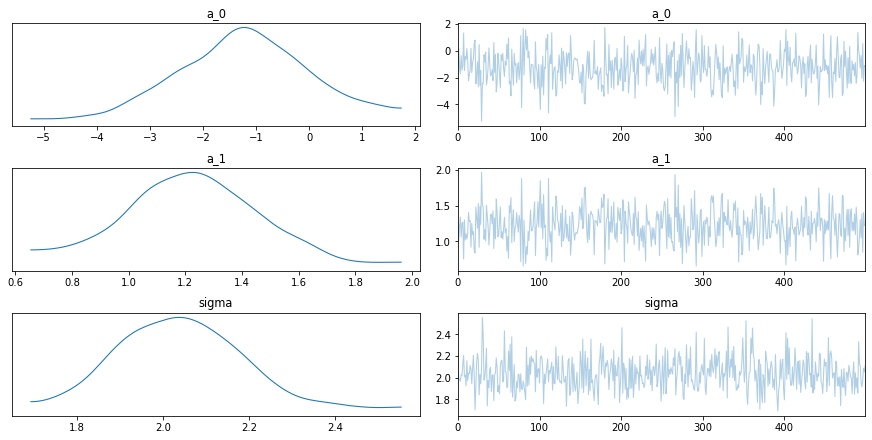

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


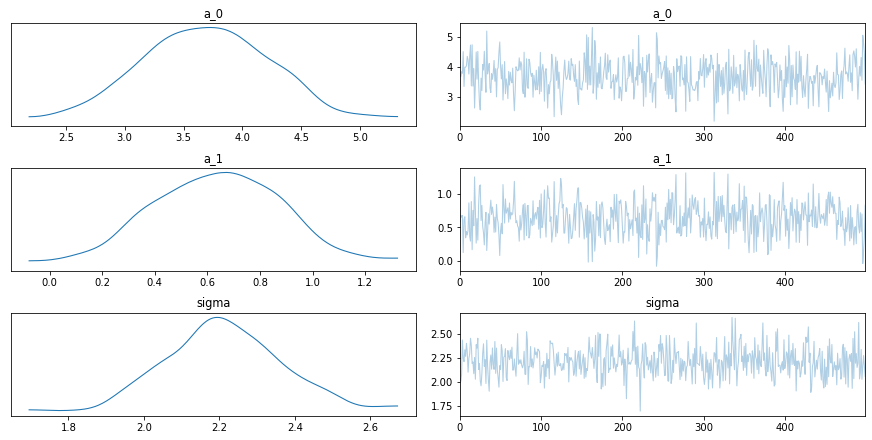

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


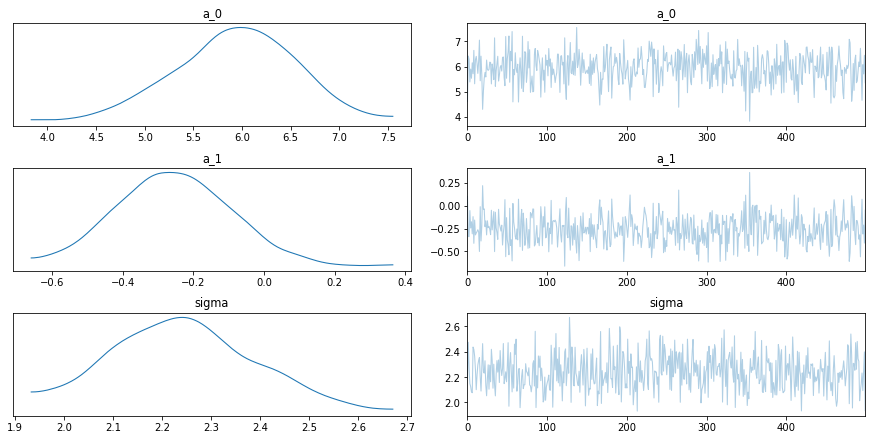

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


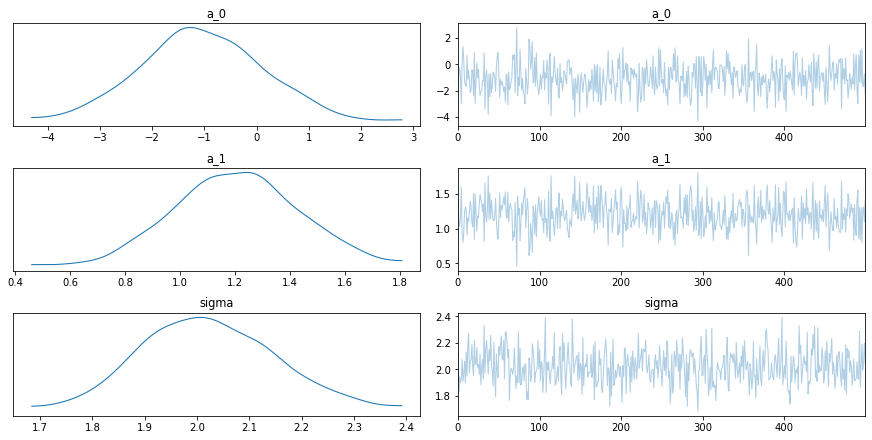

In [122]:
for trace in traces_VI:
    az.plot_trace(trace)
    plt.show()

<BarContainer object of 4 artists>

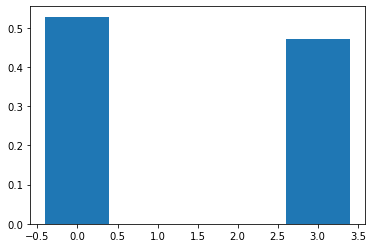

In [45]:
plt.bar(np.arange(4),np.exp(log_normalize([-a.hist[-1] for a in fits_VI])))

## Compare the various fitting algos

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


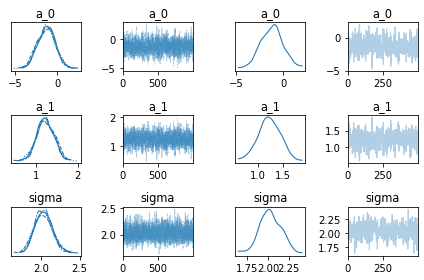

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


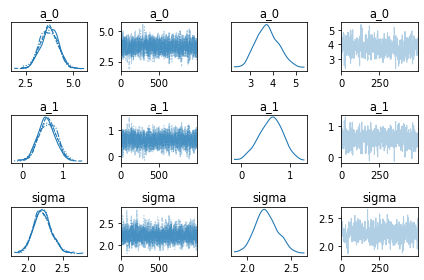

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


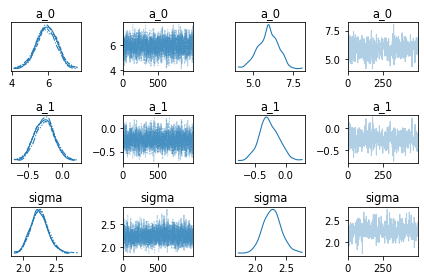

C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


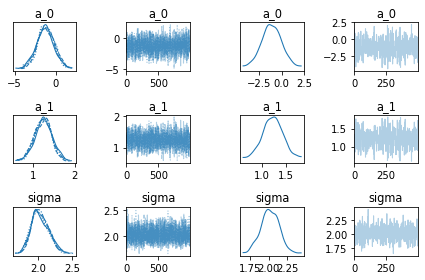

In [30]:
for m_NUTS, m_VI, t_NUTS, t_VI in zip(models, models_VI, traces, traces_VI):
    fig, axes = plt.subplots(3,4)
    az.plot_trace(t_NUTS, axes=axes[:,:2])
#     plt.show()
    az.plot_trace(t_VI, axes=axes[:,2:])
    fig.tight_layout()
    plt.show()

## Joint model

In [109]:
%autoreload 2
from model_fitting import define_model_joint

In [112]:
results = define_model_joint(L, category_i, outcome_i)

Sequential sampling (5 chains in 1 job)
CompoundStep
>NUTS: [a_1, a_0, sigma]
>CategoricalGibbsMetropolis: [z]


Sampling 5 chains for 1_000 tune and 5_000 draw iterations (5_000 + 25_000 draws total) took 551 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 129 divergences after tuning. Increase `target_accept` or reparameterize.
There were 140 divergences after tuning. Increase `target_accept` or reparameterize.
There were 142 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


(array([ 5028.,     0.,     0., 14818.,     0.,     0.,  4989.,     0.,
            0.,   165.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

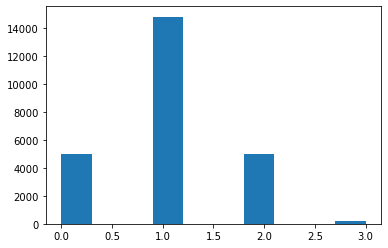

In [113]:
plt.hist(results['trace'].posterior.z.values.flatten())

## Plot learning curves of NNs

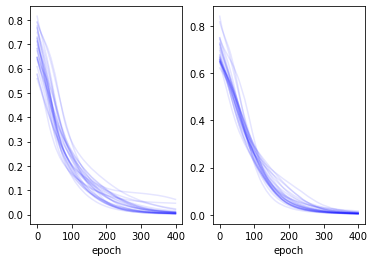

In [106]:
fig, axes = plt.subplots(1,2)
for i, (cat, df) in enumerate(cats_dfs.items()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )

    df_cleaned.plot(
        legend=False, 
        alpha=0.1, 
        color='blue',
        ax=axes[i]
    )

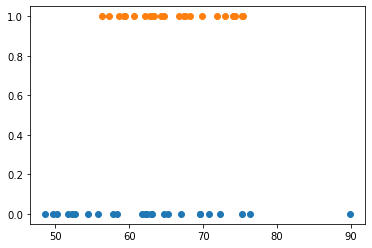

In [121]:
df = cats_dfs[100]
for i, df in enumerate(cats_dfs.values()):
    df_cleaned = (
        df.groupby(
            [c for c in df.columns if c != 'batch' and c != 'loss'],
    #         as_index=True
        )
        .mean()
        .drop(columns='batch')
        .unstack()
        ['loss']
        .T
    )
    plt.scatter(df_cleaned.sum(axis=0), [i]*25)

# Try numerical integration

In [163]:
f = lambda s, a0, a1: np.exp(model.logp({
    'sigma_log__': s,
    'a_0': a0,
    'a_1': a1
}))

In [161]:
from scipy.integrate import nquad, tplquad

In [114]:
f(0,0,0)

0.0

In [198]:
def lognorm_pdf(x, mu, sigma):
    """
    Parameters
    ----------
    x: array
        Observations
    mu: array
        The mean for each observation
    sigma: float
        Sigma of distribution
    """
    return -len(x)*np.log(sigma) - (len(x)/2)*np.log(2*np.pi) - (np.sum((x-mu)**2) / 2*sigma**2)

def loghalfnorm_pdf(x, sigma):
    return np.log(2)/2 - np.log(np.pi * sigma**2)/2 - (x**2 / (2*sigma**2))

In [192]:
loghalfnorm_pdf(2,3)

-1.5466258635350592

In [194]:
stats.halfnorm.logpdf(2,scale=3)

-1.5466258635350594

In [190]:
lognorm_pdf(np.array([0, 0, 1]),np.array([0,1,0]),1)

-3.756815599614018

In [239]:
with pm.Model() as testmodel:
    pm.Normal('a', mu=[0,1,0], sigma=1, observed=[0,0,1])

In [240]:
testmodel.logp()

array(-3.7568156)

In [217]:
def calculate_unnorm_posterior(a_0, a_1, sigma, LoT, category_i, outcome_i):
    sigma_logp = loghalfnorm_pdf(sigma,sigma=5)
    a_0_logp = lognorm_pdf(np.array([a_0]),mu=0,sigma=5)
    a_1_logp = lognorm_pdf(np.array([a_1]),mu=0,sigma=5)
    loglik = lognorm_pdf(outcome_i, a_0+category_i*a_1, sigma)
    return sigma_logp + a_0_logp + a_1_logp + loglik

In [196]:
L

array([[5. , 6.1, 4.1],
       [3. , 2. , 1. ],
       [2. , 4. , 5. ],
       [5. , 6. , 4. ]])

In [222]:
model = define_model_singleLoT(L[0], category_i, outcome_i)

In [223]:
model.logp({'a_0':0,'a_1':0,'sigma_log__':np.log(1)})

array(-1629.99112342)

In [236]:
calculate_unnorm_posterior(0,0,1,L[0],category_i,outcome_i)

-1621.0238765947647

In [241]:
marginal_lik_nquad = tplquad(
    calculate_unnorm_posterior, 
    -np.inf,
    np.inf,
    lambda x:-10,
    lambda x: 10,
    lambda x,y: 0,
    lambda x,y: 10,
    args=(L[0], category_i, outcome_i)
)

<ipython-input-198-d047cc8f0299>:12: RuntimeWarning: invalid value encountered in log
  return -len(x)*np.log(sigma) - (len(x)/2)*np.log(2*np.pi) - (np.sum((x-mu)**2) / 2*sigma**2)
C:\Users\faust\anaconda3\envs\pymc3_models\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


# Compare estimated model fit for different methods

In [538]:
import analysis
reload(analysis)
from analysis import calculate_p_LoT, get_SMC_logliks, run_frequentist_regression

In [539]:
freq_reg = run_frequentist_regression()

In [463]:
logliks = get_SMC_logliks()

In [566]:
logliks_list = [
    logliks[key] 
    for key 
    in sorted(
        logliks.keys(), 
        # The keys are string, so have to convert to int!
        key=lambda x:int(x)
    )
]

In [567]:
loglik_smc = log_mean_exp(np.array(logliks_list),axis=1).flatten()

In [471]:
with open('elbos.pkl', 'rb') as openf:
    elbos_dict = pickle.load(openf)

In [565]:
elbos_list = [
    elbos_dict[key] 
    for key 
    in sorted(
        elbos_dict.keys(), 
        key=lambda x: int(x),
    )
]

Text(0.5, 0, 'ELBO')

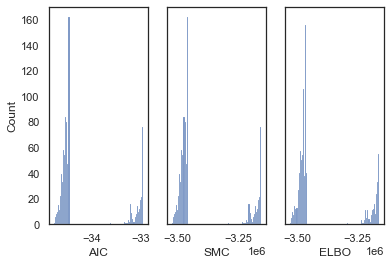

In [569]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
sns.histplot(AICs, ax=ax1)
ax1.set_xlabel("AIC")
sns.histplot(loglik_smc, ax=ax2)
ax2.set_xlabel("SMC")
sns.histplot(elbos_list, ax=ax3)
ax3.set_xlabel("ELBO")

[]

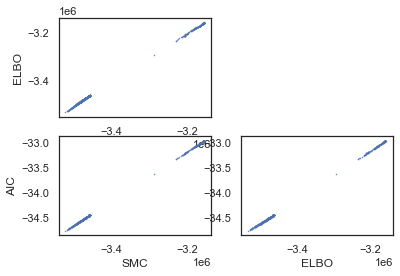

In [568]:
fig, axes = plt.subplots(2,2)

axes[0,0].scatter(loglik_smc, elbos_list, s=0.2)
axes[1,1].scatter(elbos_list, AICs, s=0.2)
axes[1,0].scatter(loglik_smc, AICs, s=0.2)

axes[1,0].set_xlabel('SMC')
axes[0,0].set_ylabel('ELBO')
axes[1,0].set_ylabel('AIC')
axes[1,1].set_xlabel('ELBO')

sns.despine(ax=axes[0,1], left=True, bottom=True)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

### Only display the languages that are best according to each estimator

In [661]:
smc_best_indices = np.argsort(loglik_smc)[:-50:-1]
elbo_best_indices = np.argsort(elbos_list)[:-50:-1]
aic_best_indices = np.argsort(AICs)[:-50:-1]

In [662]:
print('SMC: ', smc_best_indices)
print('ELBO:', elbo_best_indices)
print('AIC: ', aic_best_indices)

SMC:  [316 367 394 339 335 390 392 337 387 807 752 806 757 813 754 808 755 810
 809 812 753 758 811 756 543 588 645 706 287 226 704 643 169 124 393 338
 498 446 786 735  27  79 584 539 120 165 199 255 285]
ELBO: [387 367 316 339 390 337 335 543 394 392 393 338 498 809 807 226 588 756
 753 752 806 808 287 446 755 812 811 169 643 810 754 758 813 757 645 704
 706 124 735  79 786  27 584 539 165 255 149 199 120]
AIC:  [367 316 394 339 335 390 392 337 807 811 810 809 808 752 806 753 812 755
 756 757 758 754 813 387 543 588 645 706 226 287 643 704 169 124 338 393
 498 446 735 786  27  79 539 584 165 120 199 255 224]


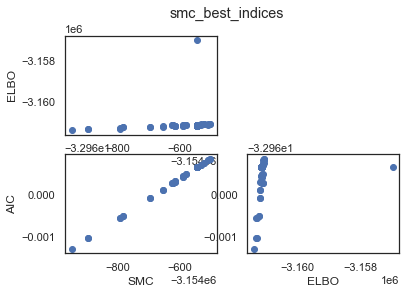

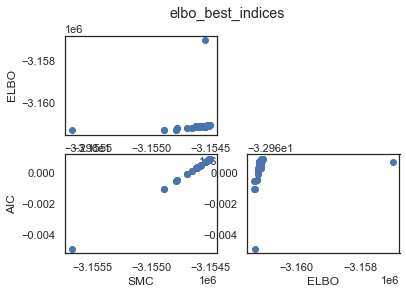

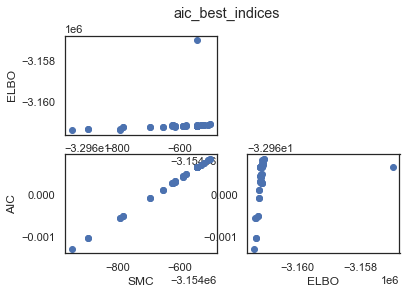

In [663]:
loop_list = zip(
    [smc_best_indices, elbo_best_indices, aic_best_indices],
    ['smc_best_indices', 'elbo_best_indices', 'aic_best_indices']
)
for best_indices, name in loop_list:
    
    fig, axes = plt.subplots(2,2)

    axes[0,0].scatter(
        loglik_smc[best_indices], 
        np.array(elbos_list)[best_indices], 
    #     s=0.2
    )
    axes[1,1].scatter(
        np.array(elbos_list)[best_indices], 
        np.array(AICs)[best_indices], 
    #     s=0.2
    )
    axes[1,0].scatter(
        loglik_smc[best_indices], 
        np.array(AICs)[best_indices], 
    #     s=0.2
    )

    axes[1,0].set_xlabel('SMC')
    axes[0,0].set_ylabel('ELBO')
    axes[1,0].set_ylabel('AIC')
    axes[1,1].set_xlabel('ELBO')

    sns.despine(ax=axes[0,1], left=True, bottom=True)
    axes[0,1].set_xticks([])
    axes[0,1].set_yticks([])
    
    fig.suptitle(name)
    plt.show()

### Find which operators are more frequent among the languages that best conform to the NN learning data

In [703]:
indices_to_operators_df = LoT_indices_to_operators(
    use_whole_effective_LoT_indices=True
)

In [707]:
indices_to_operators_df.sum(axis=0)

O      450
A      394
N      450
C      480
B      440
X      406
NA     464
NOR    448
NC     496
dtype: int64

In [713]:
indices_to_operators_df['smc'] = loglik_smc
indices_to_operators_df['aic'] = AICs
indices_to_operators_df['elbo'] = elbos_list

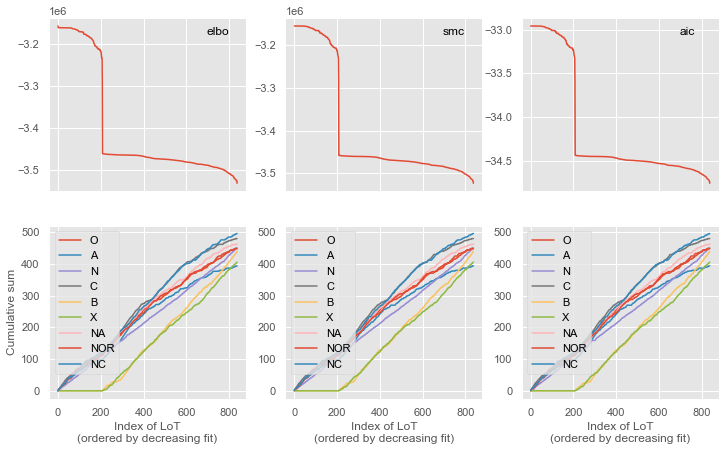

In [778]:
plt.style.use('ggplot')

fig, axes = plt.subplots(2,3, figsize=(12,7), sharex=True)

for i, name in enumerate(['elbo', 'smc', 'aic']):
    
    (
        indices_to_operators_df
        .sort_values(name, ascending=False)
        .reset_index(drop=True)
        [name]
        .plot(ax=axes[0,i])
    )
    
    (
        indices_to_operators_df
        .sort_values(name, ascending=False)
        .cumsum(axis=0)
        .loc[:,'O':'NC']
        .reset_index(drop=True)
        .plot(ax=axes[1,i])
    )
    
    axes[0,i].text(
        0.8,
        0.9,
        name,transform = axes[0,i].transAxes,
        c='black',
        fontsize='large'
    )
    for t in axes[1,i].get_legend().get_texts():
        t.set_color('black')
    axes[1,i].set_xlabel('Index of LoT\n(ordered by decreasing fit)')

axes[1,0].set_ylabel('Cumulative sum')
plt.show()

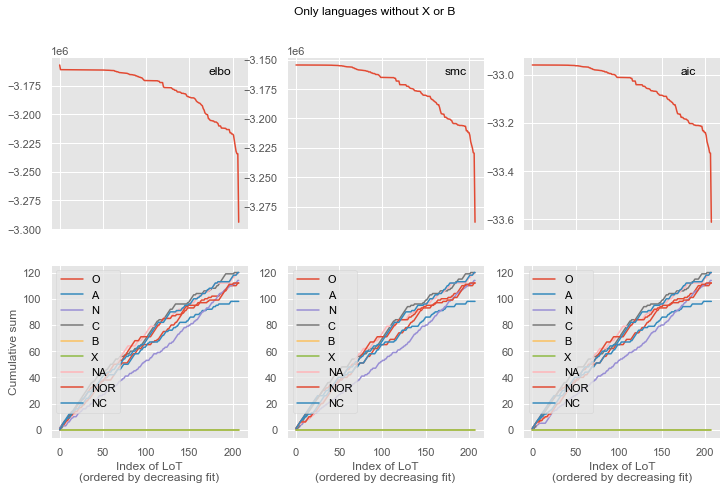

In [796]:
plt.style.use('ggplot')

fig, axes = plt.subplots(2,3, figsize=(12,7), sharex=True)

for i, name in enumerate(['elbo', 'smc', 'aic']):
    
    (
        indices_to_operators_df
        .sort_values(name, ascending=False)
        .reset_index(drop=True)
        [name]
        # at 208 is the first appearance of X or B
        [:208]
        .plot(ax=axes[0,i])
    )
    
    (
        indices_to_operators_df
        .sort_values(name, ascending=False)
        .cumsum(axis=0)
        .loc[:,'O':'NC']
        # at 208 is the first appearance of X or B
        [:208]
        .reset_index(drop=True)
        .plot(ax=axes[1,i])
    )
    
    axes[0,i].text(
        0.8,
        0.9,
        name,transform = axes[0,i].transAxes,
        c='black',
        fontsize='large'
    )
    for t in axes[1,i].get_legend().get_texts():
        t.set_color('black')
    axes[1,i].set_xlabel('Index of LoT\n(ordered by decreasing fit)')

axes[1,0].set_ylabel('Cumulative sum')
fig.suptitle('Only languages without X or B', color='black')
plt.show()

<AxesSubplot:>

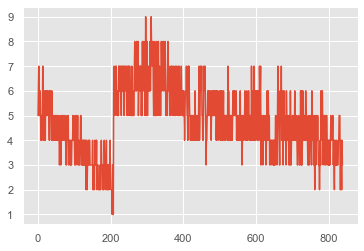

In [799]:
(
    indices_to_operators_df
    .sort_values('smc', ascending=False)
    .reset_index(drop=True)
    .loc[:,'O':'NC']
    .sum(axis=1)
    .plot()
)

In [797]:
(
    indices_to_operators_df
    .sort_values('smc', ascending=False)
    .reset_index(drop=True)
)

,O,A,N,C,B,X,NA,NOR,NC,smc,aic,elbo
0,True,True,False,False,False,False,True,True,True,-3.154504e+06,-32.959128,-3.161062e+06
1,True,True,True,False,False,False,True,True,True,-3.154504e+06,-32.959128,-3.161057e+06
2,True,True,True,True,False,False,True,True,True,-3.154510e+06,-32.959161,-3.161108e+06
3,True,True,False,True,False,False,True,True,True,-3.154511e+06,-32.959161,-3.161080e+06
4,True,True,False,True,False,False,False,True,True,-3.154524e+06,-32.959225,-3.161095e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
833,False,True,False,False,True,True,False,False,True,-3.515810e+06,-34.723331,-3.525969e+06
834,False,False,False,False,True,True,False,False,True,-3.516323e+06,-34.725835,-3.525805e+06
835,False,False,False,False,True,False,True,False,False,-3.518140e+06,-34.734705,-3.526053e+06
836,False,False,True,False,True,True,True,False,False,-3.518455e+06,-34.736246,-3.526433e+06


# Plots raw data

In [495]:
df = pd.DataFrame({
    'cost': cost_i,
    'cat': category_i
})

In [515]:
df['cat'] = df['cat'].astype(int)

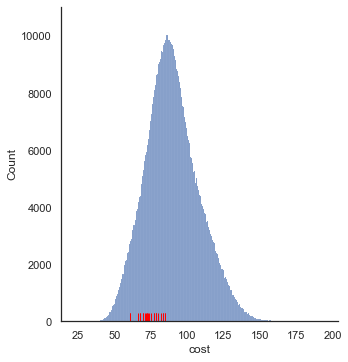

In [523]:
sns.displot(cost_i)
cat_for_rug = 4000
sns.rugplot(
    df[df['cat']==cat_for_rug]['cost'],
    c='red'
)
plt.show()

In [504]:
cost_i.std()

18.277154385390876

In [508]:
cost_stds = (
    df
    .groupby('cat')
    .std()
    .reset_index()
)['cost']

<AxesSubplot:ylabel='Density'>

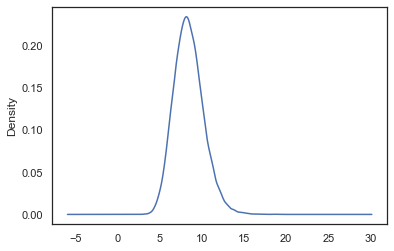

In [513]:
cost_stds.plot(kind='kde')